# 공간분석과 공간통계: 최근린지수(Nearest Neighbor Index, NNI)
### 가천대학교 공간정보시스템(14842001) 장요한 (ycanns@gachon.ac.kr)
-------------

#### 1. Initialization

In [1]:
import sys
!{sys.executable} -m pip install geopandas
# ! pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 57.7 MB/s eta 0:00:00


In [2]:
import geopandas as gpd
import numpy as np, matplotlib.pyplot as plt
from scipy.spatial import cKDTree

import os

#### 2. supply points (전국 시도 중심점 예시)

In [3]:
coordinates = np.array([(37.55724163, 126.9871252), (35.16218448, 129.054632), (35.85547861, 128.5793766), (37.46044164, 126.7004407), (35.1481661, 126.8521798), (36.34082679, 127.3987915), (35.5470358, 129.2569736), (37.45758953, 127.3429823), (37.8087934, 128.2723599), (36.76601606, 127.7690261), (36.54486254, 126.9145592), (35.73520285, 127.1688519), (34.87756336, 126.9620679), (36.16849991, 128.987314), (35.36637585, 128.2590894), (33.38684247, 126.5548156), (36.51783299, 127.2853503)])


#### 3. Data 전처리

In [4]:
# Extract latitude and longitude values
latitudes = coordinates[:, 0]
longitudes = coordinates[:, 1]

#### 4.인접 점들 간의 최근린 거리 계산

In [5]:
# Calculate nearest neighbor distances
tree = cKDTree(coordinates)
distances, _ = tree.query(coordinates, k=2)

#### 5. 계산된 인접 근린값의 평균 산출

In [6]:
# Calculate observed nearest neighbor distance
observed_distance = np.mean(distances[:, 1])

#### 6. 랜덤(random) 포인트를 생성하여 비교해보기

In [7]:
# Generate random point pattern for comparison
min_lat, max_lat = min(latitudes), max(latitudes)
min_lon, max_lon = min(longitudes), max(longitudes)
random_latitudes = np.random.uniform(min_lat, max_lat, size=len(coordinates))
random_longitudes = np.random.uniform(min_lon, max_lon, size=len(coordinates))
random_coordinates = np.column_stack((random_latitudes, random_longitudes))


#### 7. 랜덤하게 생성된 포인트의 최근린거리 및 평균값 산출

In [8]:
# Calculate nearest neighbor distances for random pattern
random_tree = cKDTree(random_coordinates)
random_distances, _ = random_tree.query(random_coordinates, k=2)

# Calculate expected nearest neighbor distance
expected_distance = np.mean(random_distances[:, 1])

8. 랜덤하게 생성된 근린값과 샘플의 근린값을 비교하여 지수 산출

In [10]:
# Calculate nearest neighbor index
nearest_neighbor_index = observed_distance / expected_distance

#### 9. 시각화

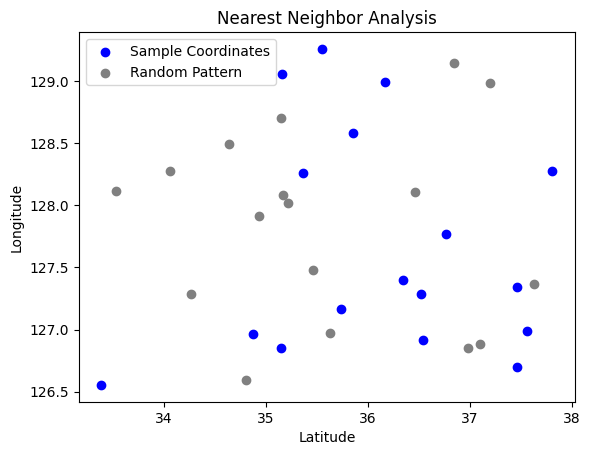

Observed nearest neighbor distance: 0.5037670979524154
Expected nearest neighbor distance: 0.4892972964842746
Nearest neighbor index: 1.0295726168366552


In [11]:
# Visualization
plt.scatter(latitudes, longitudes, color='blue', label='Sample Coordinates')
plt.scatter(random_latitudes, random_longitudes, color='gray', label='Random Pattern')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Nearest Neighbor Analysis')
plt.legend()

plt.show()

print("Observed nearest neighbor distance:", observed_distance)
print("Expected nearest neighbor distance:", expected_distance)
print("Nearest neighbor index:", nearest_neighbor_index)

END CODE